# Data and Questions

In [1]:
library(tidyverse)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




### About the Dataset

The dataset comprises 607 observations related to Data Science positions, encompassing various details about salaries as outlined below.

Columns and their descriptions are listed below:
-  __work_year:__  The year the salary was paid.<br>
-  __experince_level:__  The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director. <br>
-  __employment_type:__  The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance <br> 
-  __job_title:__  The role worked in during the year. <br>
-  __salary:__  The total gross salary amount paid.<br>
-  __salary_currency:__  The currency of the salary paid as an ISO 4217 currency code.<br>
-  __salary_in_usd:__  The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).<br>
-  __employee_residence:__  Employee's primary country of residence in during the work year as an ISO 3166 country code.<br>
-  __remote_ratio:__  The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%).<br>
-  __company_location:__  The country of the employer's main office or contracting branch as an ISO 3166 country code.<br>
-  __company_size:__  The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large).

In [2]:
salary_data <- read_csv("ds_salaries.csv")


head(salary_data)

New names:
• `` -> `...1`
Rows: 607 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


### Questions

##### Some of the potential questions that I would be answering using predictive analysis are: 
<br>
    
1. __How does experience level and job title affect job salary__
    - Explanatory variable: experience_level, job_title
    - Response variable: salary_in_usd

<br>
    
2. __Does salary vary significantly based on the year it was paid__
    - Explanatory variable: year
    - Response variable: salary_in_usd
    

<br>

3. __What is the impact of remote work ratio on salary__
    - Explanatory variable: remote_ratio
    - Response variable: salary_in_usd

<br>

4. __Do employees in different company sizes earn significantly different salaries?__
    - Explanatory variable: company_size
    - Response variable: salary_in_usd
    
<br>

5. __Can we predict salary in USD based on salary currency and salary?__
    - Explanatory variable: salary_currency, salary
    - Response variable: salary_in_usd

### Initial and Brief EDA to get an understanding of the dataset

##### Bar chart representing average salaries for each job title

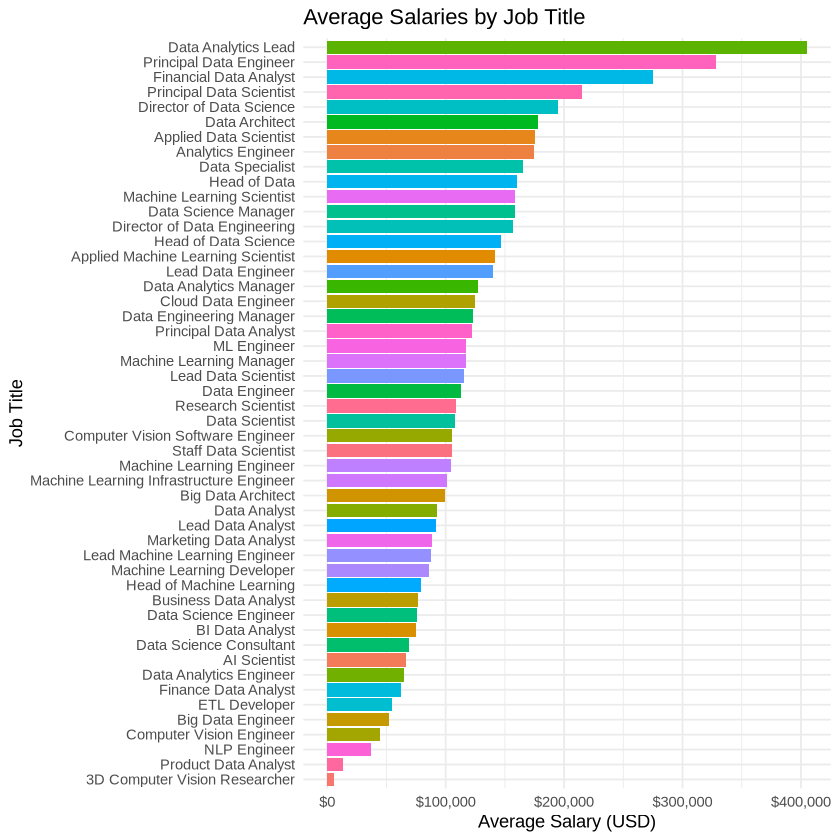

In [3]:
mean_salary_per_job_title <- salary_data %>%
  group_by(job_title) %>%
  summarise(avg_salary = mean(salary_in_usd)) %>%
  ggplot(aes(x = reorder(job_title, avg_salary), y = avg_salary, fill = job_title)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Average Salaries by Job Title",
       x = "Job Title",
       y = "Average Salary (USD)") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_y_continuous(labels = scales::dollar_format())

mean_salary_per_job_title

##### Bar chart representing average salaries by each company size

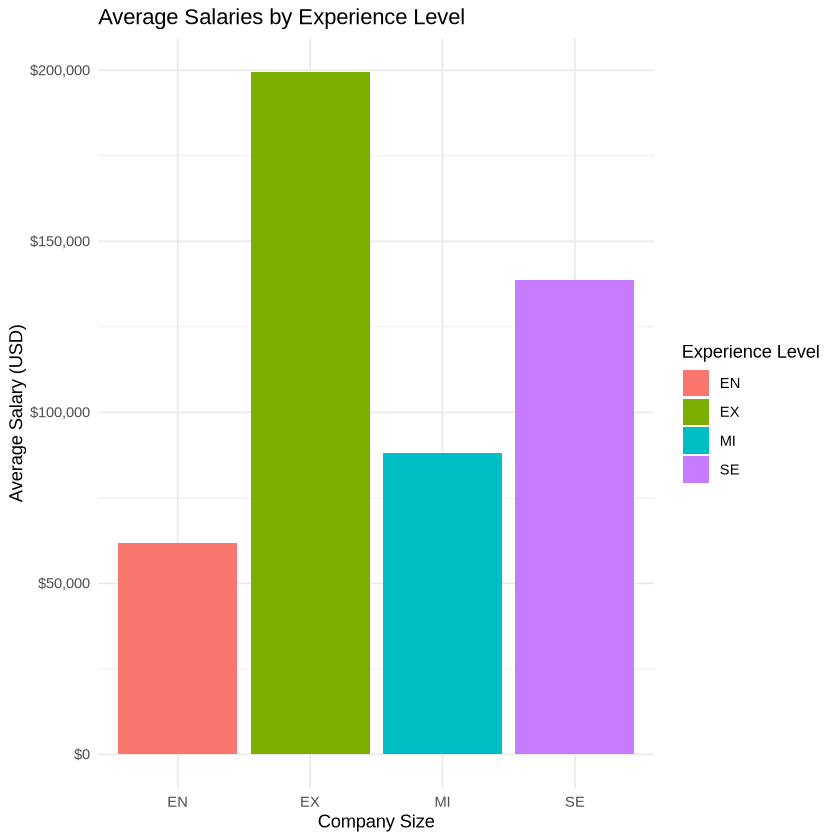

In [4]:
average_salary <- salary_data %>%
  group_by(experience_level) %>%
  summarise(avg_salary = mean(salary_in_usd))

mean_salaries_by_company_size <- ggplot(average_salary, aes(x = experience_level, y = avg_salary, fill = experience_level)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Salaries by Experience Level",
       x = "Company Size",
       y = "Average Salary (USD)",
       fill = "Experience Level") +
  theme_minimal() +
  scale_y_continuous(labels = scales::dollar_format())

mean_salaries_by_company_size